<a href="https://colab.research.google.com/github/MANISH007700/PyTorch_Lightning_Learning/blob/master/Tutorial_1_Intro_to_Torch_XOR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Course Link ###
https://pytorch-lightning.readthedocs.io/en/latest/notebooks/course_UvA-DL/01-introduction-to-pytorch.html

In [ ]:
# install pkges and libs 

!pip install "torchmetrics>=0.3" "matplotlib" "torch>=1.6, <1.9" "pytorch-lightning>=1.3"

     |████████████████████████████████| 397 kB 12.3 MB/s 
     |████████████████████████████████| 804.1 MB 2.8 kB/s 
     |████████████████████████████████| 527 kB 46.7 MB/s 
     |████████████████████████████████| 952 kB 40.0 MB/s 
     |████████████████████████████████| 829 kB 45.8 MB/s 
     |████████████████████████████████| 134 kB 51.2 MB/s 
     |████████████████████████████████| 596 kB 45.5 MB/s 
     |████████████████████████████████| 1.1 MB 39.8 MB/s 
     |████████████████████████████████| 271 kB 50.6 MB/s 
     |████████████████████████████████| 144 kB 50.7 MB/s 
     |████████████████████████████████| 94 kB 3.2 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=b2dd3924d8ddf3afe3d69aaa1aedb5200b64c112bb3af1f1236c33eacb37e132
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future
  Attempting uninstall: setuptools
    Found existing installation: setuptools

In [ ]:
# standard libs # 
import time 
import os 
import numpy as np 
import math 
import tqdm 
import matplotlib.pyplot as plt 
from tqdm.notebook import tqdm 


# torch libs #
import torch 
import torch.nn as nn 
import torch.utils.data as data


In [ ]:
# version of torch # 
print("Torch Version is: ", torch.__version__)

Torch Version is:  1.10.0+cu111


In [ ]:
# set manual seed below # 
torch.manual_seed(84)

## Tensors

In [ ]:
three_d_tensor = torch.Tensor(2,3,4)
three_d_tensor

tensor([[[6.7900e-03, 3.0725e-41, 7.0065e-44, 7.0065e-44],
         [6.3058e-44, 6.7262e-44, 7.0065e-44, 6.3058e-44],
         [7.0065e-44, 7.5670e-44, 1.1771e-43, 6.7262e-44]],

        [[7.7071e-44, 8.1275e-44, 7.4269e-44, 7.5670e-44],
         [8.1275e-44, 7.2868e-44, 7.9874e-44, 6.4460e-44],
         [7.0065e-44, 7.1466e-44, 7.2868e-44, 7.4269e-44]]])

In [ ]:
three_d_tensor.shape

# 2,3,4 -- length of tensor block, number of rows, number of columns 

torch.Size([2, 3, 4])

In [ ]:
(three_d_tensor[1])

tensor([[7.7071e-44, 8.1275e-44, 7.4269e-44, 7.5670e-44],
        [8.1275e-44, 7.2868e-44, 7.9874e-44, 6.4460e-44],
        [7.0065e-44, 7.1466e-44, 7.2868e-44, 7.4269e-44]])

In [ ]:
# create tensor prefilled 
torch.rand(3,2)     # random value between 0 and 1 
torch.randn(3,2)    # random value which are sampled from normal dist having mean 0 and variance 1 
torch.zeros(2,3)
torch.ones(3,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
# create tensor from nested list 
a = [ 
     [1, 3, 4], 
     [5, 3, 2]
    ]
print(a)
a_tensor = torch.Tensor(a)
print(a_tensor)

[[1, 3, 4], [5, 3, 2]]
tensor([[1., 3., 4.],
        [5., 3., 2.]])


In [ ]:
# check dtype
a_tensor[0][1].dtype

torch.float32

In [ ]:
a_tensor.shape, a_tensor.size()

(torch.Size([2, 3]), torch.Size([2, 3]))

In [ ]:
# Tensor to numpy and numpy to tensor 
array_a = np.array([[1,2,3], [4,5,6]])
torch_a = torch.from_numpy(array_a)

print(array_a)
print(torch_a)

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]])


In [ ]:
np_array_from_tensor = torch_a.numpy()
print(np_array_from_tensor)

[[1 2 3]
 [4 5 6]]


In [ ]:
# to convert a tensor back to numpy, the tensor should be first on cpu rather than gpu 
# to convert a gpu tensor to cpu tensor 

cpu_from_gpu_tensor = torch_a.cpu().numpy()
cpu_from_gpu_tensor

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
# create 10 element in range
torch.arange(10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
rand_1 = torch.rand(2,3)
rand_2 = torch.rand(2,3)
print(rand_1, rand_2)

tensor([[0.5531, 0.2837, 0.1318],
        [0.8071, 0.8613, 0.2720]]) tensor([[0.1169, 0.5769, 0.0788],
        [0.6099, 0.3372, 0.0969]])


In [ ]:
sum_rand = rand_1 + rand_2 
sum_rand

tensor([[0.6700, 0.8606, 0.2106],
        [1.4170, 1.1984, 0.3689]])

In [ ]:
# This creates a new memory space to store `sum_rand` 
# we can replace rand_2 with the summation of both rand_1 and rand_2 
print("Before Addition: ", rand_2)
rand_2.add_(rand_1)
print("After Addition: ", rand_2)

Before Addition:  tensor([[0.1169, 0.5769, 0.0788],
        [0.6099, 0.3372, 0.0969]])
After Addition:  tensor([[0.6700, 0.8606, 0.2106],
        [1.4170, 1.1984, 0.3689]])


In [ ]:
# Change dimension using view 
print("Actual Tensor with shape: ")
print(rand_1, rand_1.shape)
print("After Using View to Change dim: " )
print(rand_1.view(3,2), rand_1.view(3,2).shape)
print("After Using Transpose: ")
print(rand_1.T, rand_1.T.shape) 

# 2*3 can be changed to 3*2 and 6*1 and 1*6 
# Just remember, to have same number of elements 

# changed_dim = rand_1.view(3,2)
# print(changed_dim)
# print(changed_dim.shape)

Actual Tensor with shape: 
tensor([[0.5531, 0.2837, 0.1318],
        [0.8071, 0.8613, 0.2720]]) torch.Size([2, 3])
After Using View to Change dim: 
tensor([[0.5531, 0.2837],
        [0.1318, 0.8071],
        [0.8613, 0.2720]]) torch.Size([3, 2])
After Using Transpose: 
tensor([[0.5531, 0.8071],
        [0.2837, 0.8613],
        [0.1318, 0.2720]]) torch.Size([3, 2])


In [ ]:
# permute - change ordering and swapping 
new_tensor = torch.rand(2,3,3)   # shape - 2*3*3
print(new_tensor) 

permute_tensor = new_tensor.permute(1,0,2)   # shape - 3*2*3
print(permute_tensor)


tensor([[[0.6251, 0.6708, 0.2840],
         [0.5023, 0.7931, 0.5938],
         [0.7356, 0.4270, 0.3327]],

        [[0.5846, 0.1143, 0.0316],
         [0.2461, 0.8154, 0.5759],
         [0.9902, 0.7441, 0.6154]]])
tensor([[[0.6251, 0.6708, 0.2840],
         [0.5846, 0.1143, 0.0316]],

        [[0.5023, 0.7931, 0.5938],
         [0.2461, 0.8154, 0.5759]],

        [[0.7356, 0.4270, 0.3327],
         [0.9902, 0.7441, 0.6154]]])


In [ ]:
# Matric Multiplication # 
# .matmul() - normal matrix multiplication 
matrix_a = torch.rand(9).view(3,3).float()
matrix_b = torch.rand(3,3)
print(matrix_a) 
print(matrix_b)

print(torch.matmul(matrix_a, matrix_b))

tensor([[0.3369, 0.4774, 0.8701],
        [0.1938, 0.9801, 0.6994],
        [0.3473, 0.3341, 0.2473]])
tensor([[0.5926, 0.2135, 0.4718],
        [0.0197, 0.0036, 0.3289],
        [0.3974, 0.6830, 0.7241]])
tensor([[0.5548, 0.6679, 0.9460],
        [0.4121, 0.5227, 0.9203],
        [0.3107, 0.2443, 0.4528]])


In [ ]:
a = [ 
     [1,2],
     [2,3]
    ]
a = np.array(a)
a = torch.Tensor(a)
b = torch.Tensor(np.array([[1,2], [3,4]]))
print(a)
print(b)

# matrix multiplication
print(torch.matmul(a,b))

tensor([[1., 2.],
        [2., 3.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[ 7., 10.],
        [11., 16.]])


In [ ]:
# point wise multiplication 
torch.mul(a, b)

tensor([[ 1.,  4.],
        [ 6., 12.]])

In [ ]:
# gradient and computational graph #
x = torch.Tensor(
      [
       [1,2,3,4,5], 
       [3,4,5,6,7]
      ],
).float()
x

tensor([[1., 2., 3., 4., 5.],
        [3., 4., 5., 6., 7.]])

In [ ]:
x.requires_grad

False

In [ ]:
# let's make a small computational graph # 
# input 
x = torch.arange(3, dtype = float, requires_grad=True)
x

tensor([0., 1., 2.], dtype=torch.float64, requires_grad=True)

In [ ]:
a = x+2 
b = a**2 
c = b + 3 
Y = c.mean()
Y


tensor(12.6667, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [ ]:
# find gradient now 
Y.backward()

In [ ]:
x.grad

tensor([1.3333, 2.0000, 2.6667], dtype=torch.float64)

In [ ]:
# check GPU and Cuda Availability 
gpu_avail = torch.cuda.is_available()
if gpu_avail:
  print("GPU IS PRESENT")
else:
  print("NO GPU BOSS")

GPU IS PRESENT


In [ ]:
if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")
print(device) 

cuda


In [ ]:
# create tensor and push it to cuda # 
var_a = torch.randn(4,4)
var_a

tensor([[-0.1227,  0.3131,  0.2821, -0.6572],
        [-1.3184, -0.1692, -0.6128, -0.4231],
        [ 0.0800, -1.2227,  0.1328,  0.0822],
        [ 0.3546,  0.2617, -0.3614, -0.0616]])

In [ ]:
x = var_a.to(device) 
x

tensor([[-0.1227,  0.3131,  0.2821, -0.6572],
        [-1.3184, -0.1692, -0.6128, -0.4231],
        [ 0.0800, -1.2227,  0.1328,  0.0822],
        [ 0.3546,  0.2617, -0.3614, -0.0616]], device='cuda:0')

In [ ]:
# check processing speed of cpu vs gpu # 
x = torch.randn(10000,10000)

# for cpu 
start_time = time.time() 
_ = torch.matmul(x, x)
end_time = time.time()
print("Time taken: ", end_time - start_time)

# for gpu 
if torch.cuda.is_available():
  device = torch.device("cuda")
  x = x.to(device)

  start = torch.cuda.Event(enable_timing=True)
  end = torch.cuda.Event(enable_timing=True)
  start.record()
  _ = torch.matmul(x, x)
  end.record() 

  torch.cuda.synchronize() 

  print("Time taken: ", 0.001*start.elapsed_time(end))

Time taken:  25.525769233703613
Time taken:  0.9069861450195312


In [ ]:
#############################################################################################################

In [ ]:
# Let's make an XOR # 


In [ ]:
# XOR gives 1 when any one of the input is 1, else it is 0
# 0 0 0
# 0 1 1 
# 1 0 1 
# 1 1 0 

In [ ]:
# will make a 3 layered Model 
# 1 - 2 input 
# 2 - 3 hidden layers 
# 3 - 1 output 
# use tanh as activation

In [ ]:
# define model and forward pass # 

class SimpleClassfier(nn.Module):
  def __init__(self, num_inputs, num_hidden, num_outputs):
    super(SimpleClassfier, self).__init__()

  # initialize the models 
    self.linear1 = nn.Linear(num_inputs, num_hidden)
    self.act_fn = nn.Tanh() 
    self.linear2 = nn.Linear(num_hidden, num_outputs)

  # fun to forward # 
  def forward(self, x):
    x = self.linear1(x)
    x = self.act_fn(x)
    x = self.linear2(x)
    return x 
  

In [ ]:
model = SimpleClassfier(num_inputs=2, num_hidden=4, num_outputs=1)
print(model)
model

SimpleClassfier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


SimpleClassfier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
# check params # 
for name, param in model.named_parameters():
  print("Parameter Name {0}, Shape  {1}".format(name, param.shape))

Parameter Name linear1.weight, Shape  torch.Size([4, 2])
Parameter Name linear1.bias, Shape  torch.Size([4])
Parameter Name linear2.weight, Shape  torch.Size([1, 4])
Parameter Name linear2.bias, Shape  torch.Size([1])


In [ ]:
# create data for XOR 
# __getitem__is a
# using normal list comprehension 
a = [2,3,"manish", 5]
print(a[2])

# using special method - __getitem(x)__ 
print(a.__getitem__(2))

# using len()
a = [2,3,"manish",5]
print(len(a))

# using special method 
print(a.__len__())

manish
manish
4
4


## Create Data for XOR
- using Dataset Class

In [ ]:
class XORDataset(data.Dataset):
  def __init__(self, size, std=0.1):

    super(XORDataset).__init__()
    self.size = size 
    self.std = std 
    self.generate_continuous_xor()

  def generate_continuous_xor(self):
    # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
    # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
    # If x=y, the label is 0.
    data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
    label = (data.sum(dim=1) == 1).to(torch.long)
    # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
    data += self.std * torch.randn(data.shape)

    self.data = data
    self.label = label
  
  def __len__(self):
    return self.size 
  
  def __getitem__(self, idx ):
    data_point = self.data[idx]
    data_label = self.label[idx]
    return data_point, data_label


In [ ]:
# create 200 data points
dataset = XORDataset(200)
print("Size of Dataset: ", dataset.__len__())
print("DataPoint 0: ", dataset.__getitem__(0))
print(dataset[0])

Size of Dataset:  200
DataPoint 0:  (tensor([-0.0266,  0.2101]), tensor(0))
(tensor([-0.0266,  0.2101]), tensor(0))


In [ ]:
# visualize dataset 

def visualize_dataset(data, label):
  # isinstance() is used to check whether the data is of the same type provided 
  # here, it means, whether the datapoint is in torch.Tensor point ? If Yes, it returns True else False  
  if isinstance(data, torch.Tensor):
    # convert data to numpy array on cpu 
    data = data.cpu().numpy()
  
  if isinstance(label, torch.Tensor):
    label = label.cpu().numpy()
  
  data_with_value_0 = data[label == 0]
  data_with_value_1 = data[label == 1]

  # print(data_with_value_0)

  plt.figure(figsize = (4,4))
  plt.scatter(data_with_value_0[:, 0], data_with_value_0[:,1], edgecolor = "#333", label = "class 0")
  plt.scatter(data_with_value_1[:, 0], data_with_value_1[:,1], edgecolor = "#333", label = "class 1")
  plt.title("Dataset Sample")
  plt.xlabel(r"$x_2$") 
  plt.ylabel(r"$x_1$")
  plt.legend()
  


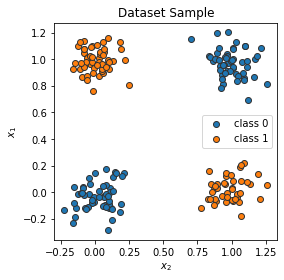

In [ ]:
visualize_dataset(dataset.data, dataset.label)
plt.show()

- using DataLoader Class

In [ ]:
# let's create a simple DataLoader 
import torch.utils.data as data
data_loader = data.DataLoader(dataset, batch_size = 8, shuffle = True, drop_last = False, pin_memory = True, num_workers = 0)

In [ ]:
data_loader

## The Entire Flow of Model
- Get a batch of data from dataloader
- pass the batch in the model and get the prediction
- Calculate loss from pred and actual label 
- Backpropogate, to calculate gradient for every param
- Update param in direction of gradient so as to lower loss

In [ ]:
# loss Modules 

In [ ]:
# for binary classification model, we have BCE [ Binary CrossEntropy Loss ]
'''
loss(bce) = -sum(ylog(y^) + (1-y)log(1-y^))
y^ - pred value 
y - original value 
'''

'\nloss(bce) = -sum(ylog(y^) + (1-y)log(1-y^))\ny^ - pred value \ny - original value \n'

In [ ]:
# since, we did not use sigmoid in last layer and our loss is based on log() of logit. We use this loss
loss_module = nn.BCEWithLogitsLoss()


In [ ]:
# for optimizer, we are using SGD. 
# momentum is used for faster convergence
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)


In [ ]:
# let's make a bigger data 
train_dataset = XORDataset(size = 5000)
train_data_loader = data.DataLoader(train_dataset, shuffle = True, drop_last = False, num_workers = 0, pin_memory = True, batch_size = 64)


In [ ]:
data, label = next(iter(train_data_loader))

In [ ]:
print(data, label)

tensor([[ 9.9024e-01,  2.2967e-01],
        [ 1.1585e+00,  1.7347e-02],
        [ 1.0063e+00,  1.0190e+00],
        [ 1.0079e+00, -8.7621e-02],
        [ 1.1039e-02,  9.7757e-01],
        [-4.6208e-02,  8.7413e-01],
        [ 1.0784e+00,  1.2718e-01],
        [ 1.0057e+00,  1.1087e+00],
        [ 1.0681e+00,  9.9611e-01],
        [ 1.1517e+00,  1.4548e-01],
        [ 1.8653e-02,  1.0556e+00],
        [ 9.5692e-04, -1.0056e-01],
        [ 1.2069e+00,  1.9724e-02],
        [ 8.5145e-01,  1.1908e-02],
        [-8.1236e-02,  1.4790e-02],
        [ 9.8370e-01,  9.8204e-01],
        [ 9.9293e-01,  1.0053e-01],
        [ 1.0179e+00,  1.1568e+00],
        [ 8.0000e-01,  1.0376e+00],
        [ 1.1520e+00,  9.7489e-01],
        [ 8.7101e-01,  9.3993e-03],
        [ 1.0907e+00,  7.4354e-02],
        [ 9.7066e-01,  1.0497e+00],
        [ 1.0293e+00, -3.0282e-01],
        [ 1.0911e+00,  9.5220e-01],
        [ 8.7354e-01,  1.0293e+00],
        [ 3.7205e-02,  1.0055e+00],
        [ 1.0621e+00,  1.037

In [ ]:
print(data.shape, label.shape)

torch.Size([64, 2]) torch.Size([64])


In [ ]:
# push model to device 
model.to(device)

SimpleClassfier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
# training is model.train() and testing is model.eval()
def train_model(model, optimizer, data_loader, loss_module, num_epochs = 200):
  model.train()
  for epoch in tqdm(range(num_epochs)):
    train_loss = 0
    for data, label in data_loader:
      
      
      # step 1 - move data and label to device 
      data = data.to(device)
      label = label.to(device)

      # step 2 - Calculate prediction 
      pred = model(data)
      # output is in [batchSize, 1], but we need only [BatchSize]
      pred = pred.squeeze(dim = 1)

      # step 3 - calculate loss 
      loss = loss_module(pred, label.float() )
      train_loss += loss
      # step 4 - calculate backprop
      optimizer.zero_grad()   # clear grad
      loss.backward()         # perform BP
      optimizer.step()        # Update weights

  if epoch+1 % 10 == 0:
    print("Loss: ", train_loss / len(data) )
    
    

In [ ]:
# train 
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
# save model 
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-3.2658, -3.3167],
        [ 4.3049, -3.0748],
        [-0.6503, -0.9281],
        [ 2.2913, -3.8830]], device='cuda:0')), ('linear1.bias', tensor([ 1.0519,  1.0507,  1.2271, -0.5548], device='cuda:0')), ('linear2.weight', tensor([[-5.5097, -6.4012,  1.6951,  6.2485]], device='cuda:0')), ('linear2.bias', tensor([1.0135], device='cuda:0'))])


In [ ]:
# save using torch.save 
torch.save(state_dict, "torch_xor_param_dict.tar")

In [ ]:
# load dict 
state_dict = torch.load("torch_xor_param_dict.tar")
# create model and store 
# new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=2)
# new_model.load_state_dict = state_dict


print(model.state_dict())
# print(new_model.state_dict())


OrderedDict([('linear1.weight', tensor([[-3.2658, -3.3167],
        [ 4.3049, -3.0748],
        [-0.6503, -0.9281],
        [ 2.2913, -3.8830]], device='cuda:0')), ('linear1.bias', tensor([ 1.0519,  1.0507,  1.2271, -0.5548], device='cuda:0')), ('linear2.weight', tensor([[-5.5097, -6.4012,  1.6951,  6.2485]], device='cuda:0')), ('linear2.bias', tensor([1.0135], device='cuda:0'))])


In [ ]:
## Evaluation
# create test data 
import torch.utils.data as data
test_dataset = XORDataset(size = 500)
test_data_loader = data.DataLoader(test_dataset, batch_size = 64, shuffle = False)

In [ ]:
data_set, label_set = next(iter(test_data_loader))
print(data_set, label_set)

tensor([[ 0.9753,  0.9337],
        [ 1.0516,  1.1873],
        [ 1.0303,  0.7953],
        [ 0.9461,  0.9836],
        [ 0.1743,  1.0763],
        [ 1.0457, -0.1106],
        [ 1.0116,  0.0822],
        [-0.1012, -0.0294],
        [-0.0263,  0.0096],
        [ 0.1316, -0.1880],
        [ 0.0725, -0.0196],
        [-0.0670, -0.1040],
        [ 1.1582,  0.0056],
        [ 0.0053,  0.0848],
        [ 1.1298,  0.0074],
        [-0.0134,  0.1103],
        [-0.0797, -0.2082],
        [-0.0034,  1.1306],
        [ 0.8885, -0.1470],
        [ 0.9361, -0.0713],
        [-0.0476,  1.0083],
        [ 0.7755,  0.9246],
        [ 1.2902,  0.1041],
        [ 1.1919,  0.8191],
        [ 1.0617, -0.1198],
        [ 1.0411,  0.9290],
        [-0.1562, -0.0326],
        [ 0.0105, -0.0966],
        [ 1.0527, -0.1081],
        [-0.1108, -0.0242],
        [ 1.0939, -0.0555],
        [-0.2336,  1.1116],
        [-0.1905,  0.0403],
        [ 0.1159,  1.0431],
        [ 0.9178,  1.0508],
        [ 0.1022, -0

In [ ]:
print(data_set.shape, label_set.shape)

torch.Size([64, 2]) torch.Size([64])


In [ ]:
# metric is Accuracy
# tp+tn / tp+tn+fp+fn

In [ ]:
# now no computation graph is required, hence model.eval() and torch.no_grad()

In [ ]:
def eval_model(model, data_loader):
  model.eval()
  true_pred, num_pred = 0.0, 0.0

  with torch.no_grad():
    for data_input, label_input in data_loader:
      data_input = data_input.to(device)
      label_input = label_input.to(device)

      pred = model(data_input)
      pred = pred.squeeze(dim=1)
      # sigmoid to map between 0 and 1 
      preds = torch.sigmoid(pred)
      pred_label = (preds>=0.5).long()

      true_pred += (pred_label == label_input).sum()
      num_pred += data_input.shape[0]

  acc = true_pred / num_pred
  print(true_pred, num_pred)
  print("Accuracy is: ", acc.data*100)

In [ ]:
eval_model(model, test_data_loader)

tensor(500., device='cuda:0') 500.0
Accuracy is:  tensor(100., device='cuda:0')


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


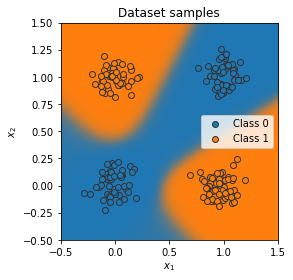

In [ ]:
# visualize the prediction 

%matplotlib inline
from IPython.display import set_matplotlib_formats
from matplotlib.colors import to_rgba

@torch.no_grad()  # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2)  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    # Specifying "None" in a dimension creates a new one
    output_image = (1 - preds) * c0[None, None] + preds * c1[None, None]
    output_image = (
        output_image.cpu().numpy()
    )  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin="lower", extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)


visualize_classification(model, dataset.data, dataset.label)
plt.show()

In [ ]:
## WOOHOOO ##